## Ejercicio de codificación #0403

### 1. Comparar algoritmos de agrupación:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
%matplotlib inline

#### 1.1. Genere datos simulados y visualice:

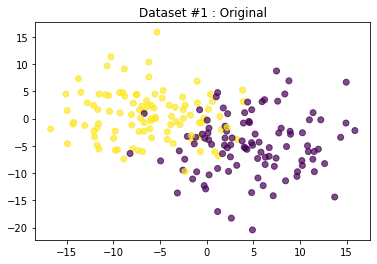

In [2]:
# Dataset #1.
X1, label1 = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std = 5, random_state=123)
plt.scatter(X1[:,0],X1[:,1], c= label1, alpha=0.7 )
plt.title('Dataset #1 : Original')
plt.show()

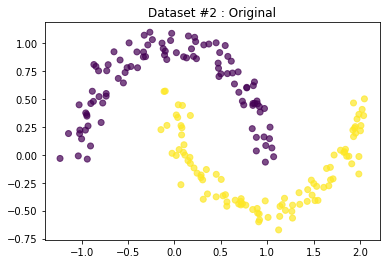

In [3]:
# Dataset #2.
X2, label2 = make_moons(n_samples=200, noise=0.08, random_state=123)
plt.scatter(X2[:,0],X2[:,1], c= label2, alpha=0.7 )
plt.title('Dataset #2 : Original')
plt.show()

#### 1.2. Aplicar k-medias y visualizar:

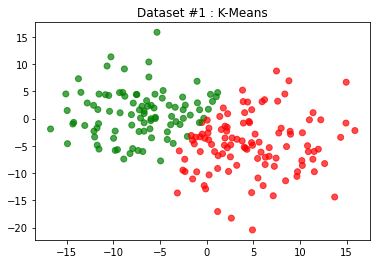

In [4]:
# Dataset #1 y dos clusteres.
kmeans = KMeans(n_clusters=2,random_state=123)                 # object kmeans para 2 clusteres. radom_state=123 significa inicialización determinista.
kmeans.fit(X1)                                                 # Aprendizaje no supervisado => Solo X1.    
myColors = {0:'red',1:'green'}                                 # Define una paleta de colores: 0 ~ 1.
plt.scatter(X1[:,0],X1[:,1], c= pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7 )    
plt.title('Dataset #1 : K-Means')
plt.show()

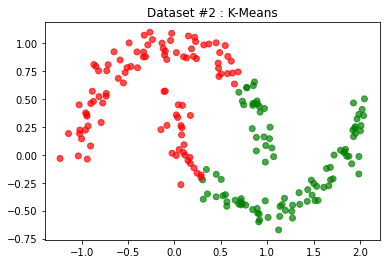

In [5]:
# Dataset #2 y dos clusteres.
kmeans = KMeans(n_clusters=2,random_state=123)                 # object kmeans para 2 clusteres. radom_state=123 significa inicialización determinista.
kmeans.fit(X2)                                                 # Aprendizaje no supervisado => Solo X1.  
myColors = {0:'red',1:'green'}                                 # Define una paleta de colores: 0 ~ 1.
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7 )
plt.title('Dataset #2 : K-Means')
plt.show()

#### 1.3. Aplicar agrupamiento aglomerativo y visualizar:

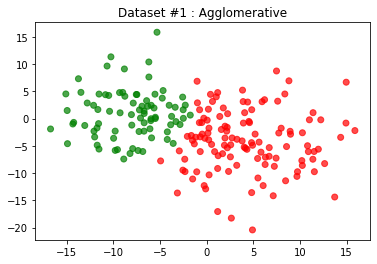

In [6]:
# Dataset #1 y dos clusteres.
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(X1)
myColors = {0:'red',1:'green'}                                 # Define una paleta de colores: 0 ~ 1.
plt.scatter(X1[:,0],X1[:,1], c= pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #1 : Agglomerative')
plt.show()

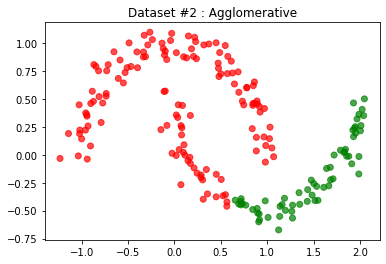

In [7]:
# Dataset #2 y dos clusteres.
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(X2)
myColors = {0:'red',1:'green'}                                 # Define una paleta de colores: 0 ~ 1.
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #2 : Agglomerative')
plt.show()

#### 1.4. Aplicar agrupación jerárquica y visualizar:

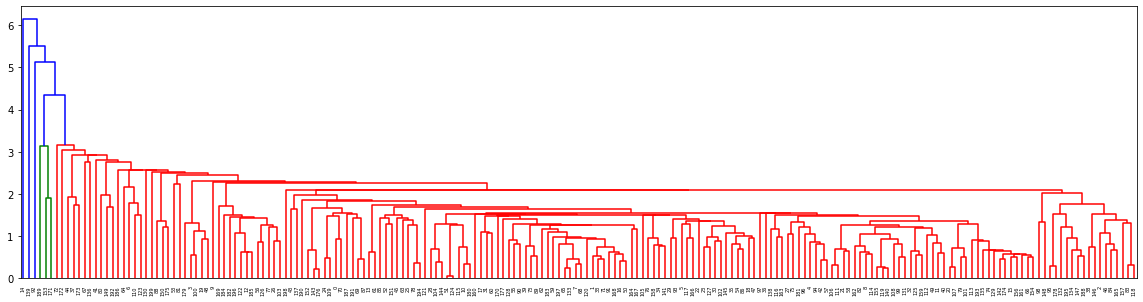

In [8]:
# Dataset #1 y mostrar dendrograma.
myLinkage = linkage(X1,method='single')       # Agrupar jerárquicamente usando enlace único.
plt.figure(figsize=(20,5))
dendrogram(myLinkage)
plt.show()

In [9]:
# Dataset #1 y grupos cortando el dendrograma.
labels = fcluster(myLinkage, 5, criterion='distance')                      # Cortar a la altura (distancia) = 5 <= cambiar este valor a voluntad.
pd.Series(labels).value_counts()

1    197
4      1
3      1
2      1
dtype: int64

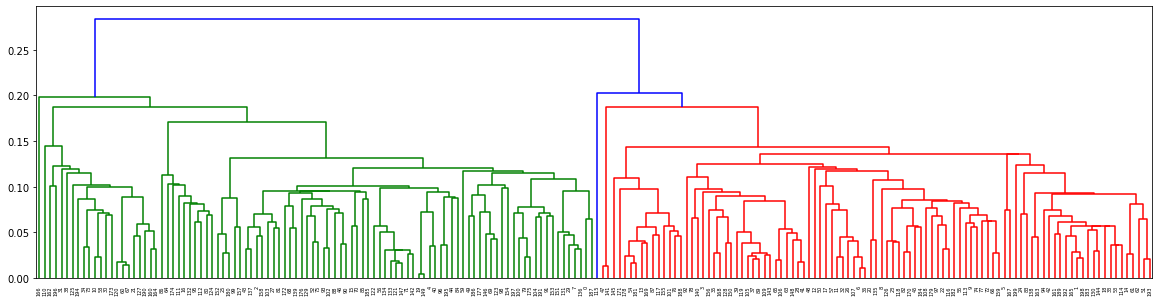

In [10]:
# Dataset #2 y mostrar dendrograma.
myLinkage = linkage(X2,method='single')       # Agrupar jerárquicamente usando enlace único.
plt.figure(figsize=(20,5))
dendrogram(myLinkage)
plt.show()

In [11]:
# Dataset #2 y grupos cortando el dendrograma.
labels = fcluster(myLinkage, 0.23, criterion='distance')                      #  Cortar a la altura (distancia) = 0.23 <= cambiar este valor a voluntad.
pd.Series(labels).value_counts()

2    100
1    100
dtype: int64

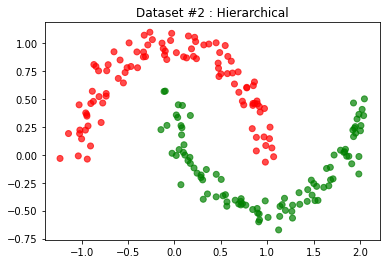

In [12]:
myColors = {1:'red',2:'green'}                                                # Define una paleta de colores: 0 ~ 1.
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(labels).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #2 : Hierarchical')
plt.show()

#### 1.5. Aplicar DBSCAN y visualizar: 

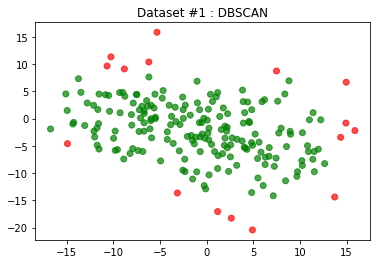

In [13]:
# Dataset #1.
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan.fit(X1)
myColors = {-1:'red',0:'green',1:'blue'}                                 # Define una paleta de colores: -1 ~ 1.  Rojo = -1 = atípicos.
plt.scatter(X1[:,0],X1[:,1], c= pd.Series(dbscan.labels_).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #1 : DBSCAN')
plt.show()

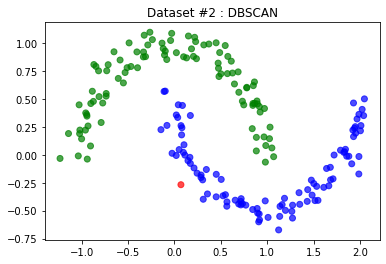

In [14]:
# Dataset #2.
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X2)
myColors = {-1:'red',0:'green',1:'blue'}                                 # Define una paleta de colores: -1 ~ 1.  Rojo = -1 = atípicos.
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(dbscan.labels_).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #2 : DBSCAN')
plt.show()

NOTA: Analizar el resultado de los diferentes algoritmos de agrupamiento.